# Improved Integration of GRASS and Jupyter

As part of Google Summer of Code 2021, we've been working to shorten and simplify the launch of GRASS in Jupyter and imporve the map displays. You can find out more abou the project and follow the progress on the [GRASS wiki page](https://trac.osgeo.org/grass/wiki/GSoC/2021/JupyterAndGRASS).

This notebook is designed to run in binder and demonstrate the usage of `grass.jupyter`, the new module of Jupyter-specific functions for GRASS.

In [1]:
import os
import subprocess
import sys
from IPython.display import Image

In [2]:
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

In [3]:
import grass.script as gs
import grass.jupyter as gj

In [4]:
# Let's check our import by printing docstring for init()
gj.init?
gj.grassRenderer?

Init signature: gj.grassRenderer(width=600, height=400, text_size=12)
Docstring:     
The grassRenderer class creates and displays GRASS maps in Jupyter
Notebooks. 
File:           /usr/local/grass80/etc/python/grass/jupyter/display.py
Type:           type
Subclasses:     


In [5]:
# Start GRASS Session
gj.init("../../../grassdata", "nc_basic_spm_grass7", "user1")

# Set default display settings
gj.display_settings()

In [6]:
# Let's see what is in the example database
print(gs.read_command("g.list", type="all"))

basins
elevation
elevation_shade
geology
lakes
landuse
soils
central_10m
state_500m
boundary_region
boundary_state
census
elev_points
firestations
geology
geonames
hospitals
points_of_interest
railroads
roadsmajor
schools
streams
streets
zipcodes



In [9]:
# Set computational region to the study area.
gs.run_command("g.region", raster="elevation", flags="pg")

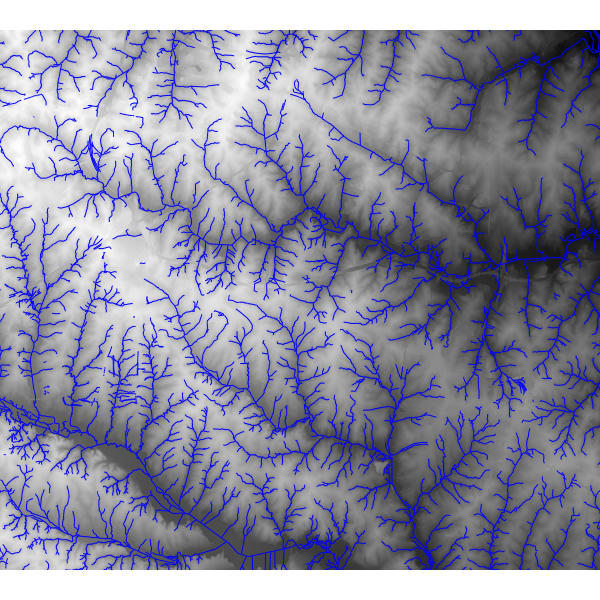

In [10]:
# Demonstration of grassRenderer for non-interactive map display
spm_map = gj.grassRenderer(height=600)

spm_map.d_rast(raster="elevation", color="grey")
spm_map.d_vect(vector="streams", color="blue", width=0.5)

spm_map.show()